In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from PIL import Image
from scipy.signal import convolve2d
import cv2

from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Conv2D, MaxPooling2D

from IPython.display import Image
from google.colab import files

Saving Mona_Lisa.jpg to Mona_Lisa.jpg


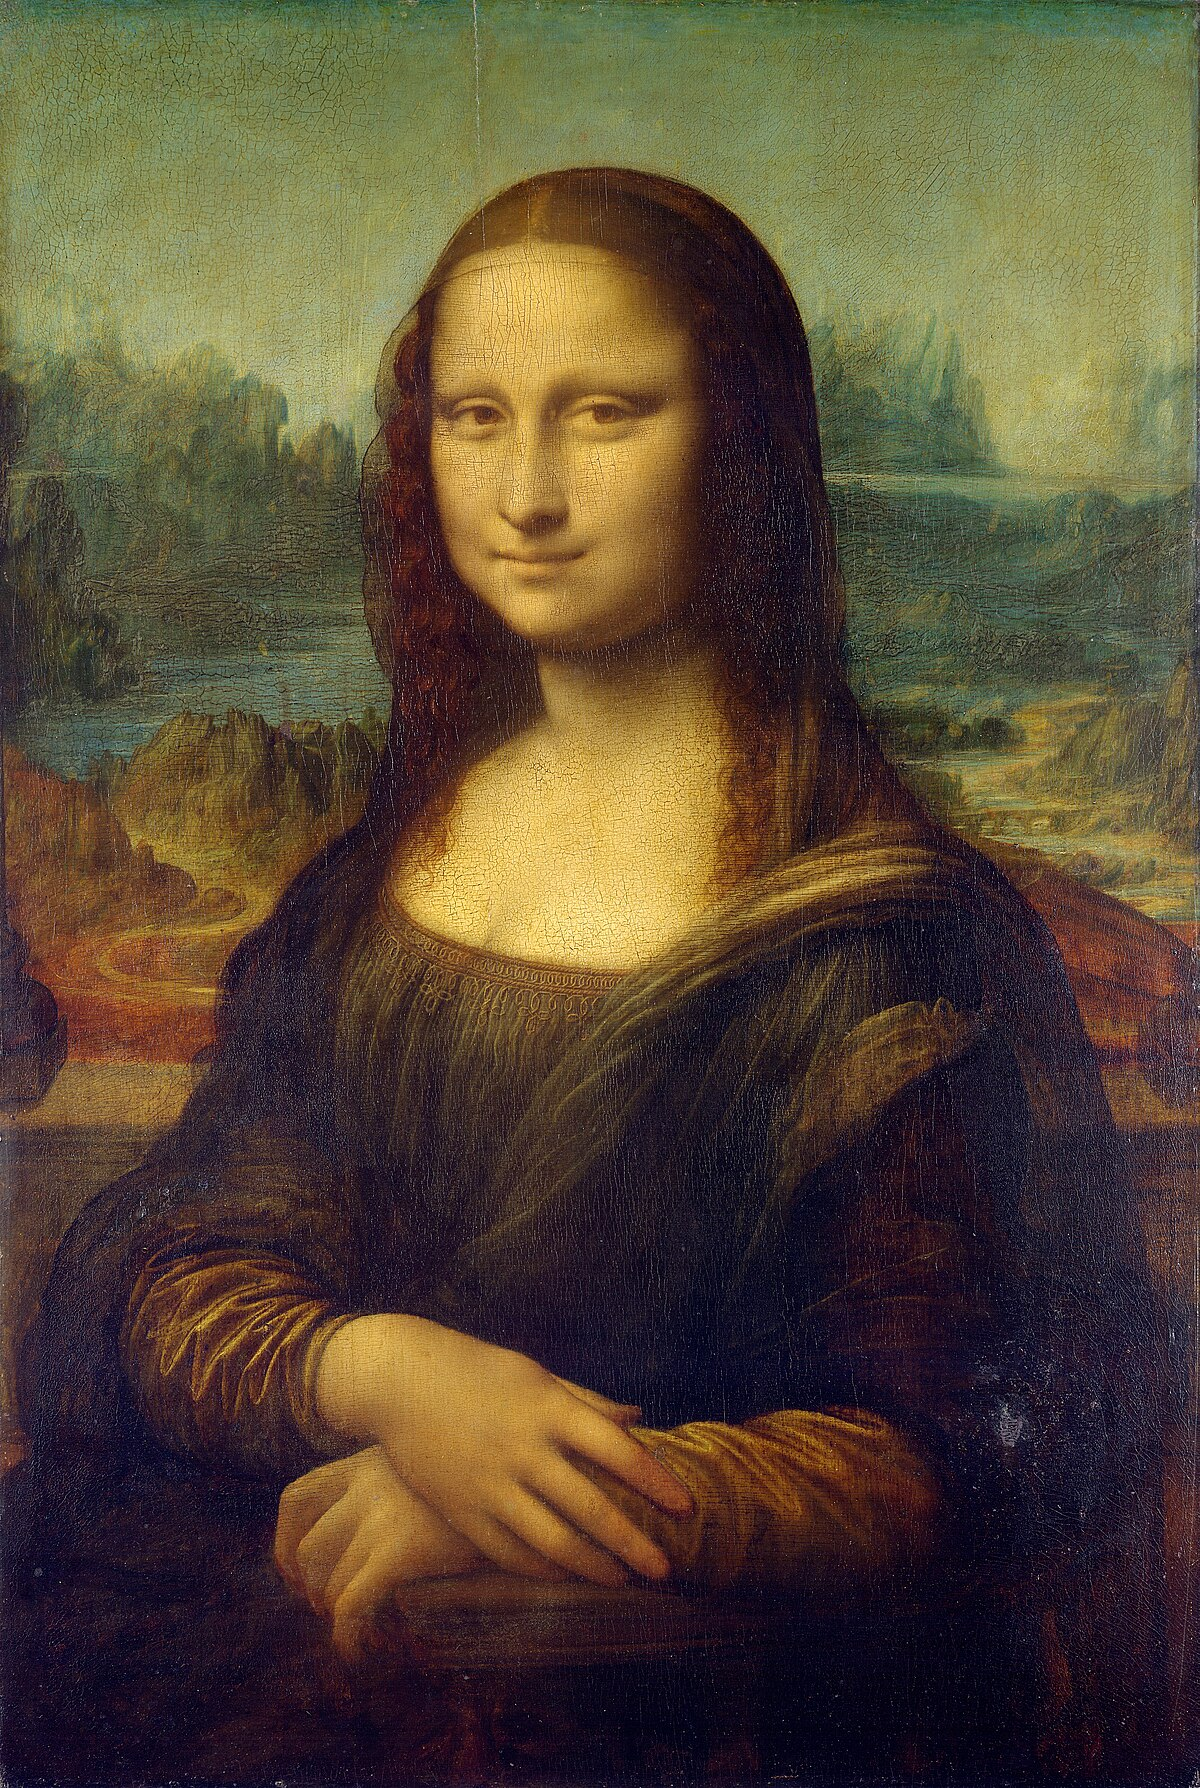

In [2]:
uploaded = files.upload()
Image('Mona_Lisa.jpg')

Saving image_2023-09-16_133305456.png to image_2023-09-16_133305456.png


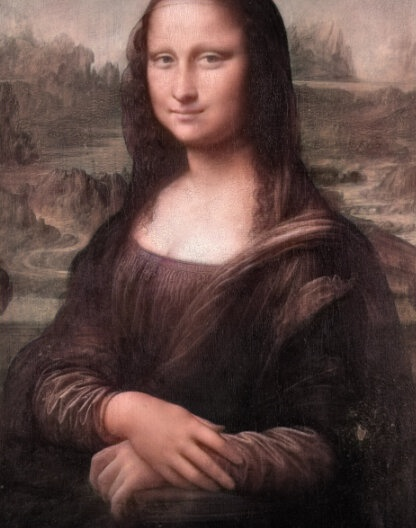

In [3]:
uploaded = files.upload()
Image('image_2023-09-16_133305456.png')

In [ ]:
def show_difference(image, kernel):
    convolved = convolve2d(image, kernel)
    fig = plt.figure(figsize=(14, 14))
    plt.subplot(121)
    plt.title('Original image')
    plt.axis('off')
    plt.imshow(image, cmap='gray')

    plt.subplot(122)
    plt.title('Convolved image')
    plt.axis('off')
    plt.imshow(convolved, cmap='gray')
    return convolved

In [ ]:
# Basic Visuaizer for Filters
def BVF(filter):
  for x in filter:
    for y in x:
      print('%d\t' % (y), end='')
    print('\n')

vertical SOBEL filter/kernel : 
1	0	1	

-2	0	2	

-1	0	1	



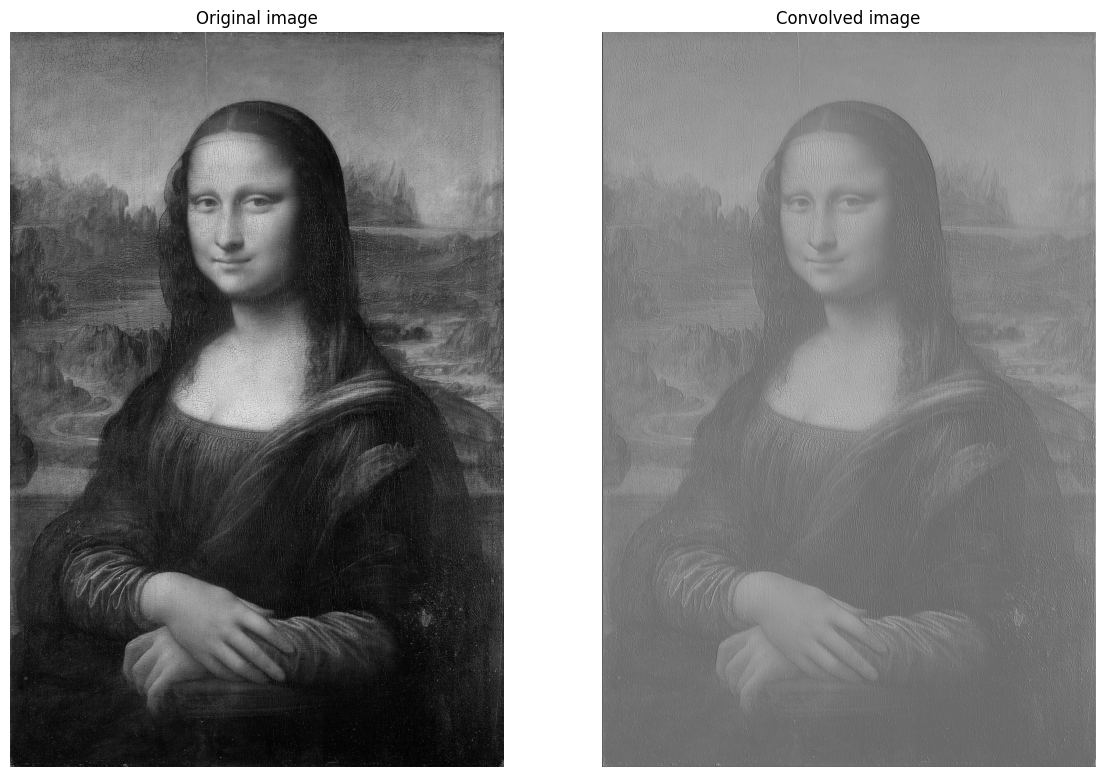

In [ ]:
dog_image = cv2.imread('Mona_Lisa.jpg')
dog_image = cv2.cvtColor(dog_image, cv2.COLOR_BGR2GRAY)

# edge detection
kernel = np.array([[1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
print('vertical SOBEL filter/kernel : ')
BVF(kernel)
dx = show_difference(dog_image, kernel)

-1	-2	-1	

0	0	0	

1	2	1	



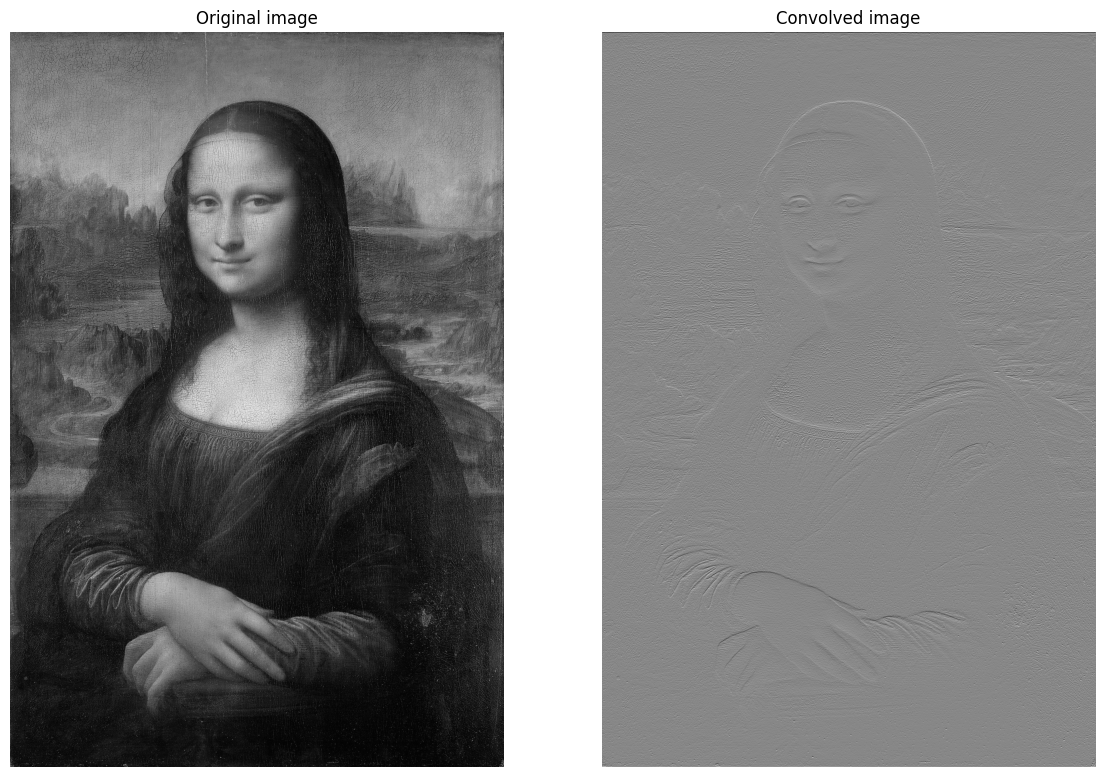

In [ ]:
kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
BVF(kernel)
dy = show_difference(dog_image, kernel)

Result of a combination of the SOBEL vertical & horizontal filters. The image seems more 3D like : 


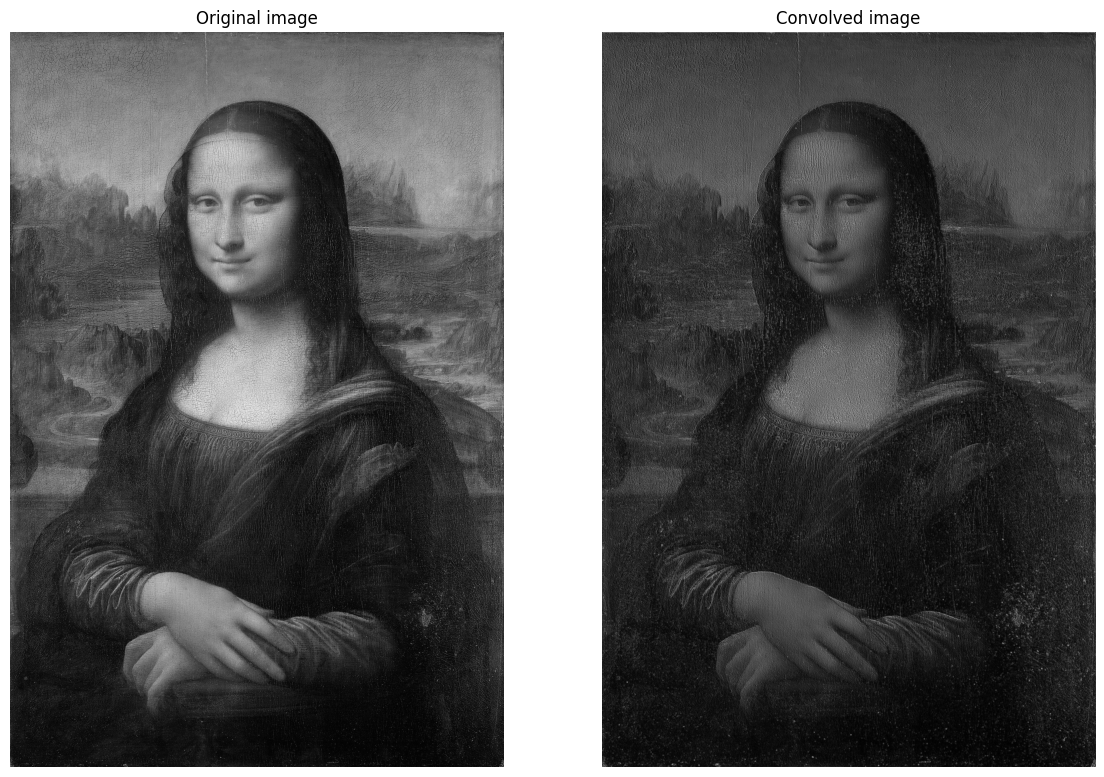

In [ ]:
mag = np.hypot(dx, dy)
mag *= 255.0 / np.max(mag)

fig = plt.figure(figsize=(14, 14))
plt.subplot(121)
plt.title('Original image')
plt.axis('off')
plt.imshow(dog_image, cmap='gray')

plt.subplot(122)
plt.title('Convolved image')
plt.axis('off')
plt.imshow(mag, cmap='gray')
print('Result of a combination of the SOBEL vertical & horizontal filters. The image seems more 3D like : ')

SHARPENING filter/kernel : 
0	-1	0	

-1	5	-1	

0	-1	0	



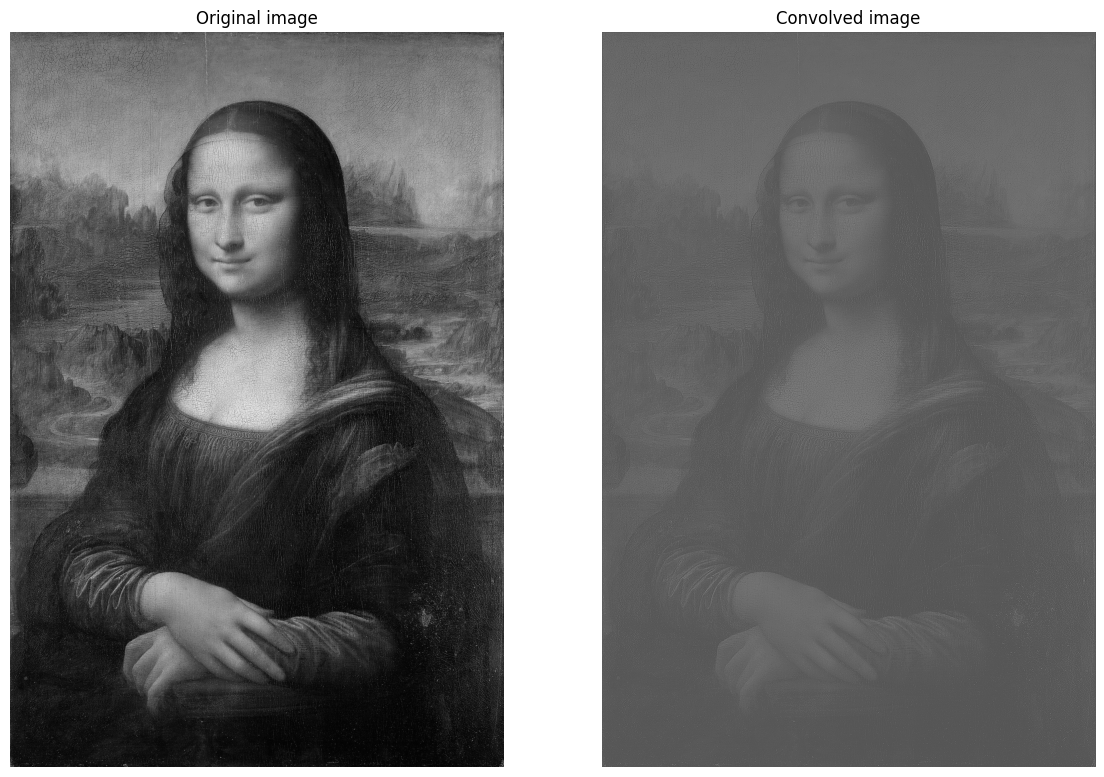

In [ ]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
print('SHARPENING filter/kernel : ')
BVF(kernel)
_ = show_difference(dog_image, kernel)

GAUSSIAN BLUR filter/kernel : 
1	2	1	

2	4	2	

1	2	1	



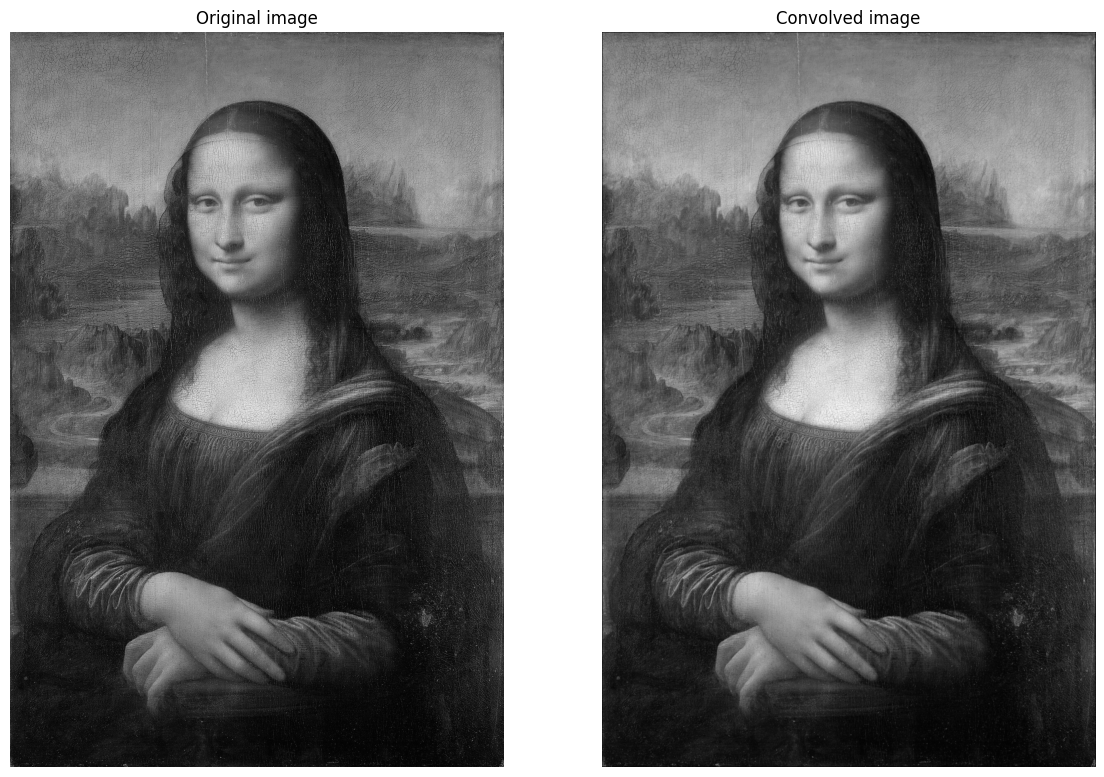

In [ ]:
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32)
print('GAUSSIAN BLUR filter/kernel : ')
BVF(kernel)
_ = show_difference(dog_image, kernel)

(1788, 1200, 3)
Original photo


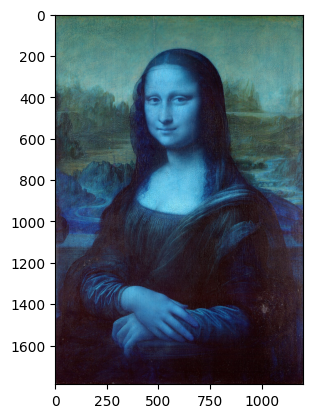

In [ ]:
dog = cv2.imread('Mona_Lisa.jpg')
print(dog.shape)
print("Original photo")
plt.imshow(dog)

In [ ]:
# create model
model = Sequential()
model.add(Conv2D(3, (15,15), padding="same", data_format="channels_last", input_shape=dog.shape))
model.add(Activation("relu"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1788, 1200, 3)     2028      
                                                                 
 activation (Activation)     (None, 1788, 1200, 3)     0         
                                                                 
Total params: 2028 (7.92 KB)
Trainable params: 2028 (7.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
dog_batch = np.expand_dims(dog, axis=0)
print(dog_batch.shape)


(1, 1788, 1200, 3)


1/1 [==============================] - 2s 2s/step


(1, 1788, 1200, 3)
(1788, 1200, 3)


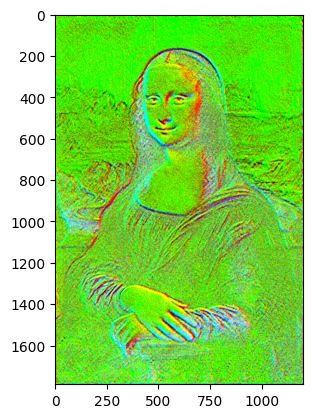

In [ ]:
conv_dog = model.predict(dog_batch)
print(conv_dog.shape)
img = np.squeeze(conv_dog, axis=0)
print(img.shape)
plt.imshow(img)

In [ ]:
def show_img(model, img):
    plt.figure(figsize=(8, 8))
    img_batch = np.expand_dims(img, axis=0)
    conv_img = model.predict(img_batch)
    conv_img = np.squeeze(conv_img, axis=0)
    print(conv_img.shape)
    conv_img = conv_img.reshape(conv_img.shape[:2])
    plt.imshow(conv_img)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 1788, 1200, 1)     28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 236ms/step
(1788, 1200, 1)


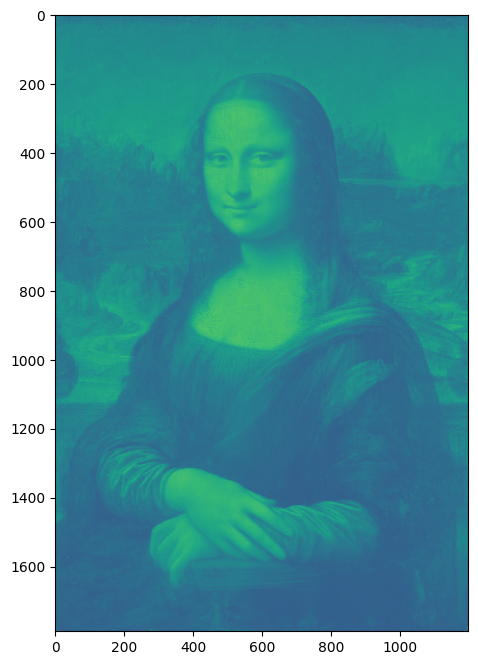

In [ ]:
model2 = Sequential()
model2.add(Conv2D(1, (3, 3), padding="same", data_format="channels_last", input_shape=dog.shape))

model2.summary()

show_img(model2, dog)

1/1 [==============================] - 0s 233ms/step
(1788, 1200, 1)


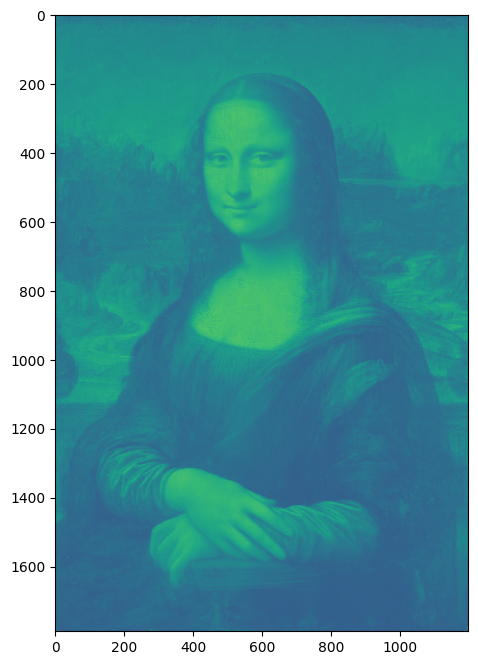

In [ ]:
model2.add(Activation("relu"))
show_img(model2, dog)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 1788, 1200, 1)     28        
                                                                 
 activation_1 (Activation)   (None, 1788, 1200, 1)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 178, 120, 1)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 178, 120, 1)       10        
                                                                 
Total params: 38 (152.00 Byte)
Trainable params: 38 (152.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 247ms/step
(1788, 1200, 1)


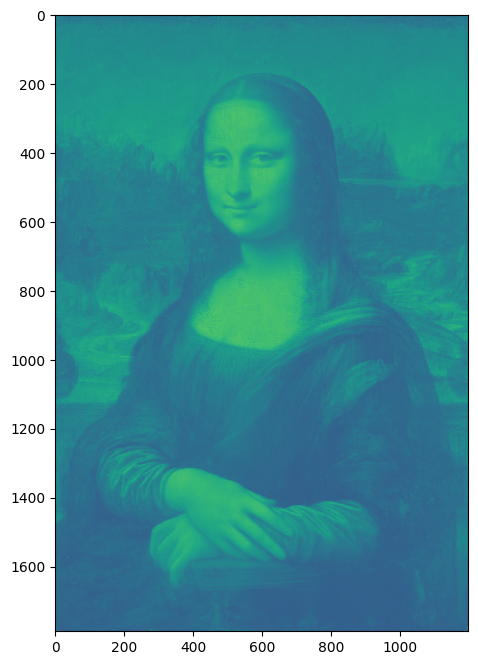

In [ ]:
model2.add(MaxPooling2D(pool_size=(10,10), data_format="channels_last"))
model2.add(Conv2D(1, (3, 3), padding="same", data_format="channels_last"))

model2.summary()


show_img(model2, dog)

1/1 [==============================] - 0s 385ms/step
(1788, 1200, 1)


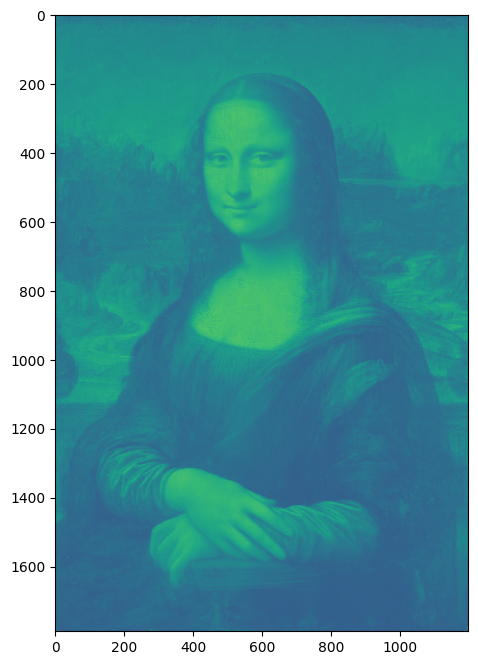

In [ ]:
show_img(model2, dog)
